In [88]:
# 1. Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''
from keras.models import Sequential
from keras.layers import Dense, GRU
import yfinance as yf
import statsmodels.api as sm

[*********************100%%**********************]  1 of 1 completed


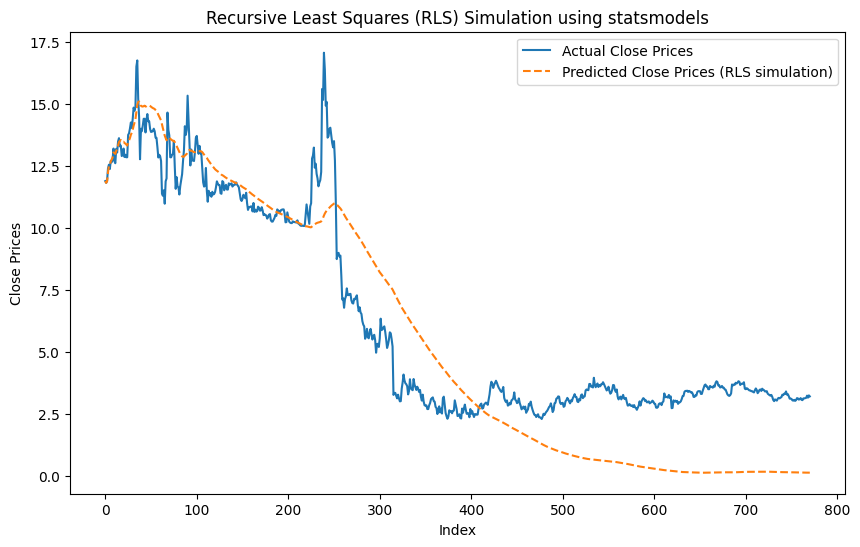

In [89]:

# Download historical stock data from Yahoo Finance
data = yf.download(tickers="GRAB", start="2020-12-01", end="2023-12-26", interval='1d')

# Use 'Close' prices as the dependent variable (output)
y = data['Close']

# Use 'Index' as an independent variable (example)
X = np.column_stack((np.ones(len(y)), np.arange(len(y))))

# Perform Recursive Least Squares (RLS) simulation
predictions = []
for i in range(len(y)):
    y_current = y.iloc[:i + 1]
    X_current = X[:i + 1, :]

    model = sm.OLS(y_current, X_current)
    results = model.fit()

    y_pred = results.predict([1, i])
    predictions.append(y_pred)


data['Predicted_Close'] = np.array(predictions).flatten()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(X[:, 1], y, label='Actual Close Prices')
plt.plot(X[:, 1], predictions, label='Predicted Close Prices (RLS simulation)', linestyle='dashed')
plt.xlabel('Index')
plt.ylabel('Close Prices')
plt.legend()
plt.title('Recursive Least Squares (RLS) Simulation using statsmodels')
plt.show()


In [90]:
evaluate_data = data

In [91]:
data = data.reset_index('Date', inplace=False)
data = data.reset_index()['Predicted_Close']
data

0      11.890000
1      11.820000
2      11.875000
3      12.243999
4      12.492000
         ...    
766     0.149875
767     0.149746
768     0.149214
769     0.149161
770     0.148912
Name: Predicted_Close, Length: 771, dtype: float64

In [92]:
evaluate_data = evaluate_data.reset_index('Date', inplace=False)
evaluate_data = evaluate_data.reset_index()['Close']

In [161]:
df= evaluate_data

In [162]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [163]:
# 4. Split train test
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [164]:
# 5. create_dataset function
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [165]:
#6. Reshape into X=t,t+1,t+2..t+29 and Y=t+30

time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [166]:
# Chia train test lại
ytest6 = scaler.inverse_transform(ytest.reshape(-1,1))

yval6 = scaler.inverse_transform(yval.reshape(-1,1))

In [167]:
# 4. Split train test
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [168]:
# 5. create_dataset function
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [169]:
#6. Reshape into X=t,t+1,t+2..t+29 and Y=t+30

time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [170]:
# Chia train test lại
ytest7 = scaler.inverse_transform(ytest.reshape(-1,1))

yval7 = scaler.inverse_transform(yval.reshape(-1,1))

In [171]:
# 4. Split train test
train_size = int(0.8 * len(df))
test_size = int(0.1 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [172]:
# 5. create_dataset function
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [173]:
#6. Reshape into X=t,t+1,t+2..t+29 and Y=t+30

time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [174]:
# Chia train test lại
ytest8 = scaler.inverse_transform(ytest.reshape(-1,1))

yval8= scaler.inverse_transform(yval.reshape(-1,1))

# 6-3-1

In [100]:
df= data

In [101]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [102]:
# 4. Split train test
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [103]:
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))

In [104]:
# 5. create_dataset function
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [105]:
#6. Reshape into X=t,t+1,t+2..t+29 and Y=t+30

time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [106]:
# 7. Reshape input to be [samples, time steps, features] which is required for RNN

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [107]:
#Define GRU model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [108]:
# 9. Fit the modle with train data
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 [==============================] - 2s 56ms/step - loss: 0.2412 - val_loss: 0.0147
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0309 - val_loss: 0.0594
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0277 - val_loss: 0.0586
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0139 - val_loss: 0.0316
Epoch 5/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0078 - val_loss: 0.0202
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0083 - val_loss: 0.0192
Epoch 7/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0050 - val_loss: 0.0205
Epoch 8/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0042 - val_loss: 0.0177
Epoch 9/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0034 - val_loss: 0.0122
Epoch 10/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0024 - val_loss: 0.0085
Epoch 11/100
7/7 [=

In [109]:
# 10. Predict test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 4ms/step


In [110]:
# 11. Inverse scaled data y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [111]:
# Chia train test lại
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

yval = scaler.inverse_transform(yval.reshape(-1,1))

In [112]:
# 12. Đánh giá độ chính xác thuật toán
valid_rmse = np.sqrt(np.mean((y_pred_val - yval6)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest6)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 3.0468619669006984
Testing RMSE: 2.905611704308868


In [113]:
from sklearn.metrics import mean_absolute_error
valid_mae = mean_absolute_error(yval6, y_pred_val)
test_mae = mean_absolute_error(ytest6, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 3.045246959683743
Testing MAE: 2.8722368143498898


In [114]:
from sklearn.metrics import mean_absolute_percentage_error
valid_mape = mean_absolute_percentage_error(yval6, y_pred_val)
test_mape = mean_absolute_percentage_error(ytest6, y_pred)
print('Validation MAPE:', valid_rmse)
print('Testing MAPE:', test_rmse)

Validation MAPE: 3.0468619669006984
Testing MAPE: 2.905611704308868


In [115]:
# 13. Dự báo 30 ngày tiếp theo
n_steps=30
start_index = max(0, len(val_data) - n_steps)

# Take the last 30 elements
selected_data = val_data[start_index:]
# Reshape for x_input
x_input = selected_data.reshape(1, -1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=30
i=0
while(i<30):

    if(len(temp_input)>30):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[-0.00222092]
31
1 day input [ 0.00154649  0.00154039  0.00157093  0.00155555  0.00154814  0.00151297
  0.00144307  0.00137424  0.00130292  0.00121138  0.00111746  0.00103533
  0.00094018  0.0008568   0.00080276  0.00074617  0.00067299  0.00060789
  0.00055785  0.00048423  0.00040817  0.00035764  0.00030806  0.0002629
  0.00022214  0.00021357  0.00017796  0.00017443  0.00015776 -0.00222092]
1 day output [[-0.00271962]]
2 day input [ 0.00154039  0.00157093  0.00155555  0.00154814  0.00151297  0.00144307
  0.00137424  0.00130292  0.00121138  0.00111746  0.00103533  0.00094018
  0.0008568   0.00080276  0.00074617  0.00067299  0.00060789  0.00055785
  0.00048423  0.00040817  0.00035764  0.00030806  0.0002629   0.00022214
  0.00021357  0.00017796  0.00017443  0.00015776 -0.00222092 -0.00271962]
2 day output [[-0.00341838]]
3 day input [ 0.00157093  0.00155555  0.00154814  0.00151297  0.00144307  0.00137424
  0.00130292  0.00121138  0.00111746  0.00103533  0.00094018  0.0008568
  0.00080276 

[*********************100%%**********************]  1 of 1 completed


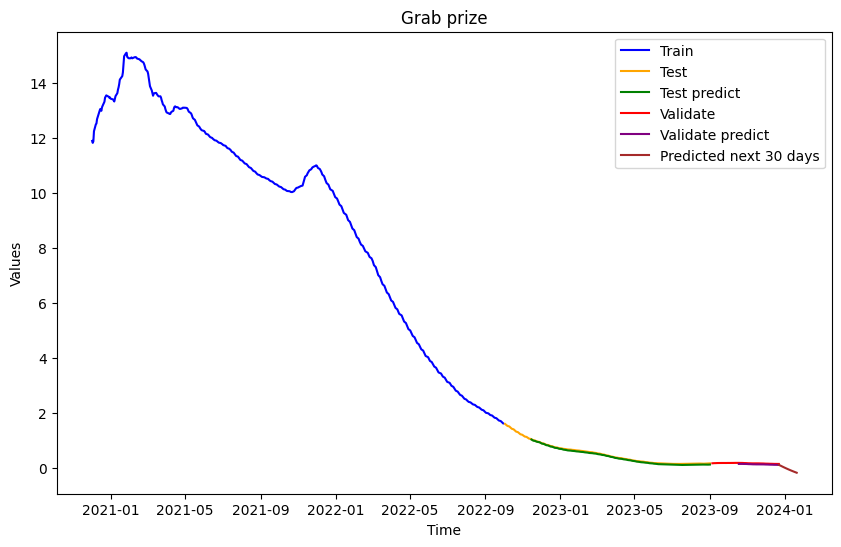

In [116]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

date = yf.download(tickers = "GRAB", start="2020-12-01", end="2023-12-26", interval='1d')
date = date.reset_index()

plt.figure(figsize=(10, 6)) 

train_plot = scaler.inverse_transform(train_data)
test_plot = scaler.inverse_transform(test_data)
test_pred_plot = y_pred
val_plot = scaler.inverse_transform(val_data)
val_pred_plot = y_pred_val
predicted_data = np.array(scaler.inverse_transform(lst_output).flatten())
# Plot real data
plt.plot(date['Date'][:len(train_plot)],train_plot, label='Train', color='blue')

# Plot predicted data starting from the end of real data
start_index = len(train_data)
end_index = start_index + len(test_data)
plt.plot(date['Date'][start_index:end_index], test_plot, label='Test', color='orange')
plt.plot(date['Date'][end_index-len(y_pred):end_index], test_pred_plot, label='Test predict', color='green')
# Plot predicted data starting from the end of real data
start_index = end_index
end_index = start_index + len(val_data)
plt.plot(date['Date'][start_index:end_index], val_plot, label='Validate', color='red')
plt.plot(date['Date'][end_index-len(y_pred_val):end_index], y_pred_val, label='Validate predict', color='purple')
# Plot predicted data starting from the end of real data
start_index = end_index
end_index = start_index + len(predicted_data)
plt.plot(pd.date_range(start=date['Date'].iloc[-1], end="2024-01-20", freq='D'), predicted_data, label='Predicted next 30 days', color='brown')


# Set labels and title
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Grab prize')
plt.legend()

plt.show()

# 7-2-1

In [146]:
df= data

In [147]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [148]:
# 4. Split train test
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [149]:
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))

In [150]:
# 5. create_dataset function
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [151]:
#6. Reshape into X=t,t+1,t+2..t+29 and Y=t+30

time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [152]:
# 7. Reshape input to be [samples, time steps, features] which is required for RNN

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [153]:
#Define GRU model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [154]:
# 9. Fit the modle with train data
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
8/8 [==============================] - 2s 50ms/step - loss: 0.2035 - val_loss: 0.0166
Epoch 2/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0303 - val_loss: 0.0610
Epoch 3/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0267 - val_loss: 0.0514
Epoch 4/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0126 - val_loss: 0.0234
Epoch 5/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0093 - val_loss: 0.0140
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0064 - val_loss: 0.0125
Epoch 7/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0036 - val_loss: 0.0097
Epoch 8/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0024 - val_loss: 0.0046
Epoch 9/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 10/100
8/8 [==============================] - 0s 12ms/step - loss: 5.4735e-04 - val_loss: 6.5890e-04
Epoch 11/10

In [155]:
# 10. Predict test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 4ms/step


In [156]:
# 11. Inverse scaled data y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [157]:
# Chia train test lại
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

yval = scaler.inverse_transform(yval.reshape(-1,1))

In [158]:
# 12. Đánh giá độ chính xác thuật toán
valid_rmse = np.sqrt(np.mean((y_pred_val - yval7)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest7)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 3.025372914341322
Testing RMSE: 3.0304885184512784


In [159]:
from sklearn.metrics import mean_absolute_error
valid_mae = mean_absolute_error(yval7, y_pred_val)
test_mae = mean_absolute_error(ytest7, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 3.0237483445634235
Testing MAE: 3.004245237242885


In [160]:
from sklearn.metrics import mean_absolute_percentage_error
valid_mape = mean_absolute_percentage_error(yval7, y_pred_val)
test_mape = mean_absolute_percentage_error(ytest7, y_pred)
print('Validation MAPE:', valid_rmse)
print('Testing MAPE:', test_rmse)

Validation MAPE: 3.025372914341322
Testing MAPE: 3.0304885184512784


In [69]:
# 13. Dự báo 30 ngày tiếp theo
n_steps=30
start_index = max(0, len(val_data) - n_steps)

# Take the last 30 elements
selected_data = val_data[start_index:]
# Reshape for x_input
x_input = selected_data.reshape(1, -1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=30
i=0
while(i<30):

    if(len(temp_input)>30):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[-0.00172842]
31
1 day input [ 0.00154649  0.00154039  0.00157093  0.00155555  0.00154814  0.00151297
  0.00144307  0.00137424  0.00130292  0.00121138  0.00111746  0.00103533
  0.00094018  0.0008568   0.00080276  0.00074617  0.00067299  0.00060789
  0.00055785  0.00048423  0.00040817  0.00035764  0.00030806  0.0002629
  0.00022214  0.00021357  0.00017796  0.00017443  0.00015776 -0.00172842]
1 day output [[-0.00231166]]
2 day input [ 0.00154039  0.00157093  0.00155555  0.00154814  0.00151297  0.00144307
  0.00137424  0.00130292  0.00121138  0.00111746  0.00103533  0.00094018
  0.0008568   0.00080276  0.00074617  0.00067299  0.00060789  0.00055785
  0.00048423  0.00040817  0.00035764  0.00030806  0.0002629   0.00022214
  0.00021357  0.00017796  0.00017443  0.00015776 -0.00172842 -0.00231166]
2 day output [[-0.00298032]]
3 day input [ 0.00157093  0.00155555  0.00154814  0.00151297  0.00144307  0.00137424
  0.00130292  0.00121138  0.00111746  0.00103533  0.00094018  0.0008568
  0.00080276 

[*********************100%%**********************]  1 of 1 completed


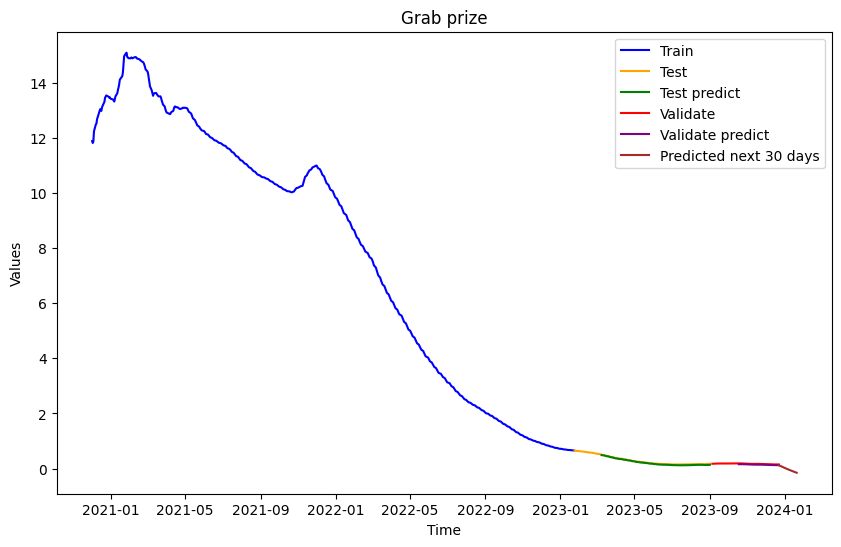

In [70]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

date = yf.download(tickers = "GRAB", start="2020-12-01", end="2023-12-26", interval='1d')
date = date.reset_index()

plt.figure(figsize=(10, 6)) 

train_plot = scaler.inverse_transform(train_data)
test_plot = scaler.inverse_transform(test_data)
test_pred_plot = y_pred
val_plot = scaler.inverse_transform(val_data)
val_pred_plot = y_pred_val
predicted_data = np.array(scaler.inverse_transform(lst_output).flatten())
# Plot real data
plt.plot(date['Date'][:len(train_plot)],train_plot, label='Train', color='blue')

# Plot predicted data starting from the end of real data
start_index = len(train_data)
end_index = start_index + len(test_data)
plt.plot(date['Date'][start_index:end_index], test_plot, label='Test', color='orange')
plt.plot(date['Date'][end_index-len(y_pred):end_index], test_pred_plot, label='Test predict', color='green')
# Plot predicted data starting from the end of real data
start_index = end_index
end_index = start_index + len(val_data)
plt.plot(date['Date'][start_index:end_index], val_plot, label='Validate', color='red')
plt.plot(date['Date'][end_index-len(y_pred_val):end_index], y_pred_val, label='Validate predict', color='purple')
# Plot predicted data starting from the end of real data
start_index = end_index
end_index = start_index + len(predicted_data)
plt.plot(pd.date_range(start=date['Date'].iloc[-1], end="2024-01-20", freq='D'), predicted_data, label='Predicted next 30 days', color='brown')


# Set labels and title
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Grab prize')
plt.legend()

plt.show()

# 8-1-1

In [175]:
df= data

In [176]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [177]:
# 4. Split train test
train_size = int(0.8 * len(df))
test_size = int(0.1 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [178]:
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))

In [179]:
# 5. create_dataset function
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [180]:
#6. Reshape into X=t,t+1,t+2..t+29 and Y=t+30

time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [181]:
# 7. Reshape input to be [samples, time steps, features] which is required for RNN

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [182]:
#Define GRU model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [183]:
# 9. Fit the modle with train data
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
10/10 [==============================] - 2s 40ms/step - loss: 0.2026 - val_loss: 0.0281
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: 0.0279 - val_loss: 0.0659
Epoch 3/100
10/10 [==============================] - 0s 11ms/step - loss: 0.0222 - val_loss: 0.0261
Epoch 4/100
10/10 [==============================] - 0s 11ms/step - loss: 0.0095 - val_loss: 0.0099
Epoch 5/100
10/10 [==============================] - 0s 12ms/step - loss: 0.0056 - val_loss: 0.0061
Epoch 6/100
10/10 [==============================] - 0s 11ms/step - loss: 0.0020 - val_loss: 0.0023
Epoch 7/100
10/10 [==============================] - 0s 11ms/step - loss: 5.7630e-04 - val_loss: 1.4335e-04
Epoch 8/100
10/10 [==============================] - 0s 11ms/step - loss: 1.6258e-04 - val_loss: 5.5744e-06
Epoch 9/100
10/10 [==============================] - 0s 11ms/step - loss: 6.8896e-05 - val_loss: 6.2626e-05
Epoch 10/100
10/10 [==============================] - 0s 11ms/step - loss: 6

In [184]:
# 10. Predict test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 4ms/step


In [185]:
# 11. Inverse scaled data y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [186]:
# Chia train test lại
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

yval = scaler.inverse_transform(yval.reshape(-1,1))

In [187]:
# 12. Đánh giá độ chính xác thuật toán
valid_rmse = np.sqrt(np.mean((y_pred_val - yval8)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest8)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 3.012051747102505
Testing RMSE: 3.401271865190528


In [188]:
from sklearn.metrics import mean_absolute_error
valid_mae = mean_absolute_error(yval8, y_pred_val)
test_mae = mean_absolute_error(ytest8, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 3.0104167635770556
Testing MAE: 3.3974493369460106


In [189]:
from sklearn.metrics import mean_absolute_percentage_error
valid_mape = mean_absolute_percentage_error(yval8, y_pred_val)
test_mape = mean_absolute_percentage_error(ytest8, y_pred)
print('Validation MAPE:', valid_rmse)
print('Testing MAPE:', test_rmse)

Validation MAPE: 3.012051747102505
Testing MAPE: 3.401271865190528


In [43]:
# 13. Dự báo 30 ngày tiếp theo
n_steps=30
start_index = max(0, len(val_data) - n_steps)

# Take the last 30 elements
selected_data = val_data[start_index:]
# Reshape for x_input
x_input = selected_data.reshape(1, -1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=30
i=0
while(i<30):

    if(len(temp_input)>30):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[-0.00340562]
31
1 day input [ 0.00154649  0.00154039  0.00157093  0.00155555  0.00154814  0.00151297
  0.00144307  0.00137424  0.00130292  0.00121138  0.00111746  0.00103533
  0.00094018  0.0008568   0.00080276  0.00074617  0.00067299  0.00060789
  0.00055785  0.00048423  0.00040817  0.00035764  0.00030806  0.0002629
  0.00022214  0.00021357  0.00017796  0.00017443  0.00015776 -0.00340562]
1 day output [[-0.0042624]]
2 day input [ 0.00154039  0.00157093  0.00155555  0.00154814  0.00151297  0.00144307
  0.00137424  0.00130292  0.00121138  0.00111746  0.00103533  0.00094018
  0.0008568   0.00080276  0.00074617  0.00067299  0.00060789  0.00055785
  0.00048423  0.00040817  0.00035764  0.00030806  0.0002629   0.00022214
  0.00021357  0.00017796  0.00017443  0.00015776 -0.00340562 -0.0042624 ]
2 day output [[-0.00535884]]
3 day input [ 0.00157093  0.00155555  0.00154814  0.00151297  0.00144307  0.00137424
  0.00130292  0.00121138  0.00111746  0.00103533  0.00094018  0.0008568
  0.00080276  

[*********************100%%**********************]  1 of 1 completed


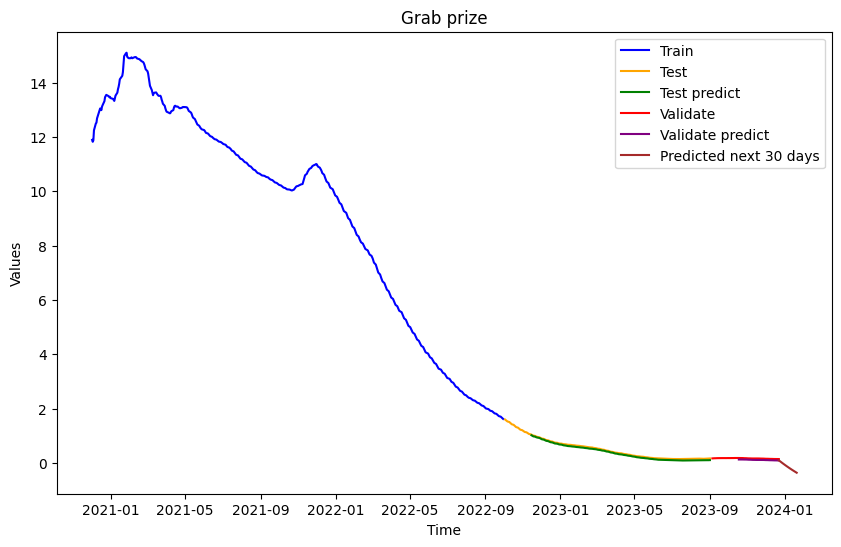

In [44]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

date = yf.download(tickers = "GRAB", start="2020-12-01", end="2023-12-26", interval='1d')
date = date.reset_index()

plt.figure(figsize=(10, 6)) 

train_plot = scaler.inverse_transform(train_data)
test_plot = scaler.inverse_transform(test_data)
test_pred_plot = y_pred
val_plot = scaler.inverse_transform(val_data)
val_pred_plot = y_pred_val
predicted_data = np.array(scaler.inverse_transform(lst_output).flatten())
# Plot real data
plt.plot(date['Date'][:len(train_plot)],train_plot, label='Train', color='blue')

# Plot predicted data starting from the end of real data
start_index = len(train_data)
end_index = start_index + len(test_data)
plt.plot(date['Date'][start_index:end_index], test_plot, label='Test', color='orange')
plt.plot(date['Date'][end_index-len(y_pred):end_index], test_pred_plot, label='Test predict', color='green')
# Plot predicted data starting from the end of real data
start_index = end_index
end_index = start_index + len(val_data)
plt.plot(date['Date'][start_index:end_index], val_plot, label='Validate', color='red')
plt.plot(date['Date'][end_index-len(y_pred_val):end_index], y_pred_val, label='Validate predict', color='purple')
# Plot predicted data starting from the end of real data
start_index = end_index
end_index = start_index + len(predicted_data)
plt.plot(pd.date_range(start=date['Date'].iloc[-1], end="2024-01-20", freq='D'), predicted_data, label='Predicted next 30 days', color='brown')


# Set labels and title
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Grab prize')
plt.legend()

plt.show()